Census Income Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("census-income.csv", skipinitialspace= True)

In [ ]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country Unnamed: 14  
0          2174             0              40  United-States       <=50K  
1             0             0              13  United-States       <=50K  
2             0             0              40  United-States       <=50K  
3             0             0              40  United-States       <=50K  
4             0             0              40           Cuba       <=50K

In [ ]:
df['Unnamed: 14'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
df.rename(columns ={'Unnamed: 14':'income'}, inplace =True)

In [ ]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.shape

(32561, 15)

Checking null values

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print("Unique values in", col,'column are:')
    print(df[col].unique())
    print('---'*20)

Unique values in workclass column are:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
------------------------------------------------------------
Unique values in education column are:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
------------------------------------------------------------
Unique values in marital-status column are:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
------------------------------------------------------------
Unique values in occupation column are:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
--------

In [ ]:
df= df.replace('?', np.nan)

In [ ]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Checking for duplicates

In [ ]:
df.duplicated().sum()

23

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

Outliers Treatment

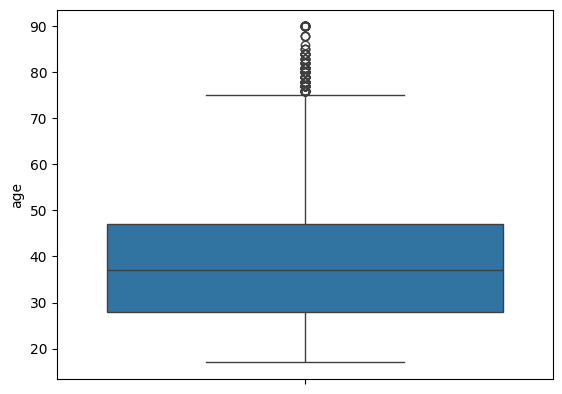

----------------------------------------------------------------------------------------------------------------------------------------------------------------


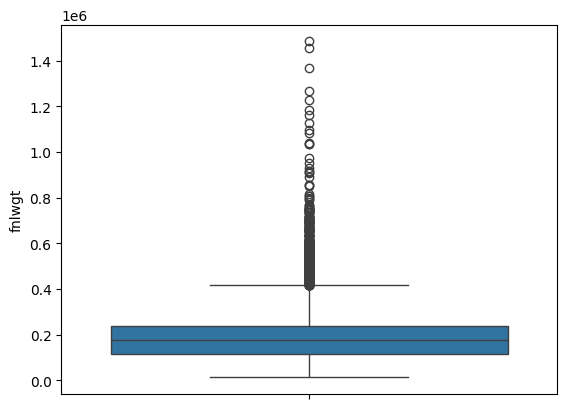

----------------------------------------------------------------------------------------------------------------------------------------------------------------


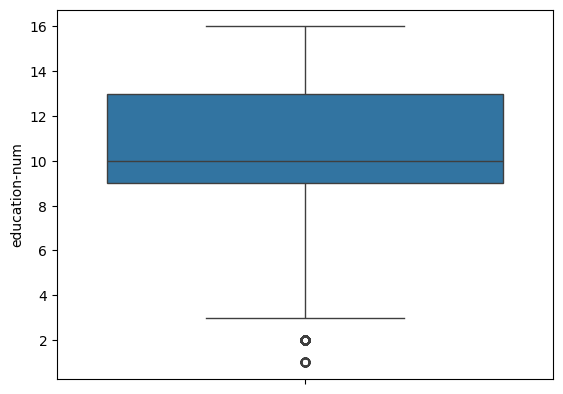

----------------------------------------------------------------------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------------------------------------------------------------------


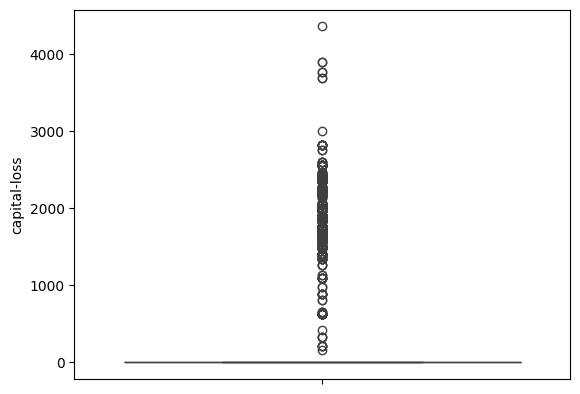

----------------------------------------------------------------------------------------------------------------------------------------------------------------


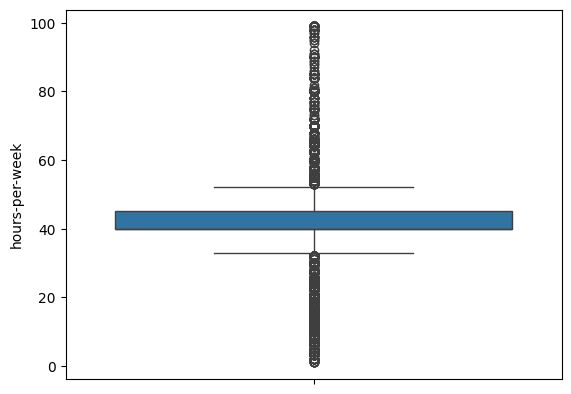

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
for col in df.columns:
  if df[col].dtype !='object':
     sns.boxplot(df[col])
     plt.show()
     print('----'*40)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
out_col = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

In [ ]:
from re import I
# IQR technique of outlier removal

for col in out_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5* IQR
  upper_bound = Q3 + 1.5 * IQR

  df = df[(df[col] >= lower_bound) & (df[col]<= upper_bound)]

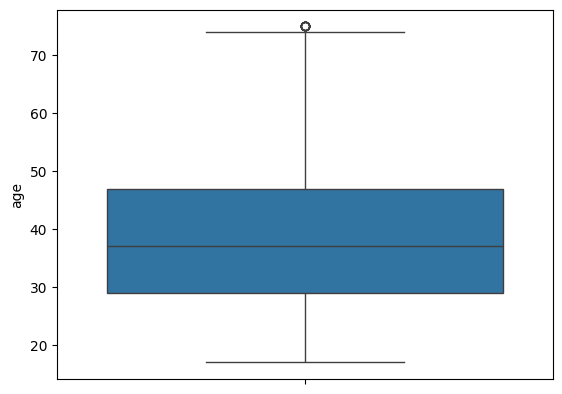

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


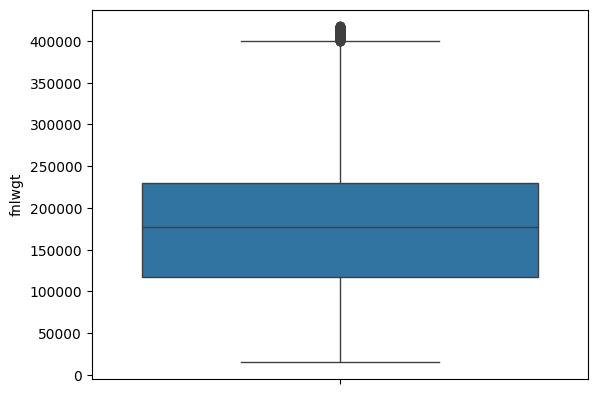

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


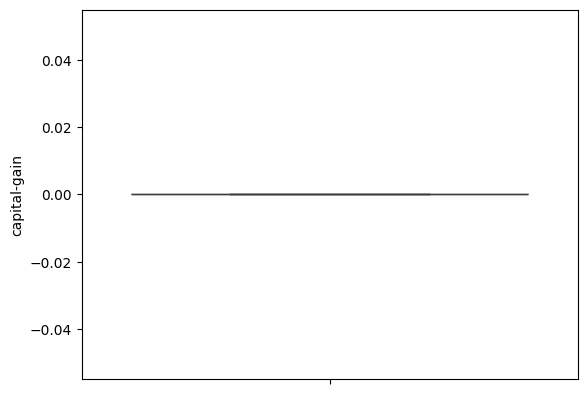

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


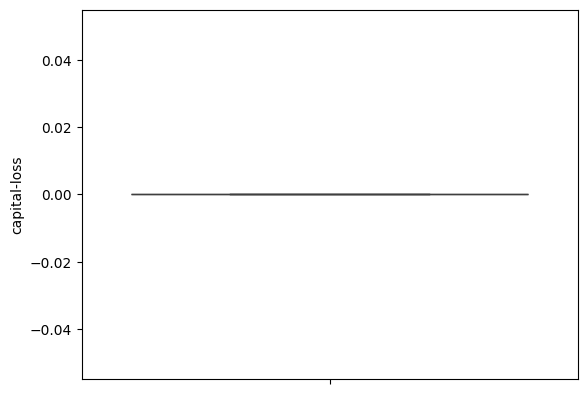

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
for col in out_col:
  sns.boxplot(df[col])
  plt.show()
  print('----'*50)

Collinearity

In [ ]:
df.corr()

<ipython-input-54-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.072423       0.004677           NaN           NaN   
fnlwgt         -0.072423  1.000000      -0.036239           NaN           NaN   
education-num   0.004677 -0.036239       1.000000           NaN           NaN   
capital-gain         NaN       NaN            NaN           NaN           NaN   
capital-loss         NaN       NaN            NaN           NaN           NaN   
hours-per-week  0.044904 -0.019828       0.127261           NaN           NaN   

                hours-per-week  
age                   0.044904  
fnlwgt               -0.019828  
education-num         0.127261  
capital-gain               NaN  
capital-loss               NaN  
hours-per-week        1.000000

In [ ]:
df.drop(columns = ['capital-gain','capital-loss'], inplace = True)

In [ ]:
df.corr()

<ipython-input-56-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


age    fnlwgt  education-num  hours-per-week
age             1.000000 -0.072423       0.004677        0.044904
fnlwgt         -0.072423  1.000000      -0.036239       -0.019828
education-num   0.004677 -0.036239       1.000000        0.127261
hours-per-week  0.044904 -0.019828       0.127261        1.000000

<ipython-input-58-80f628e707d5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues', annot = True)


<Axes: >

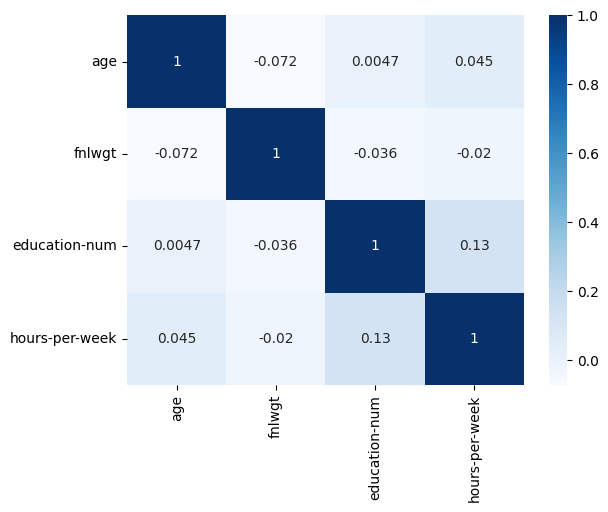

In [ ]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)

In [ ]:
# label encoding

from sklearn.preprocessing import LabelEncoder

In [ ]:
le  = LabelEncoder()

In [ ]:
df['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'State-gov', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [ ]:
df['workclass'] = le.fit_transform(df['workclass'])

In [ ]:
df['workclass']

2        2
3        2
4        2
5        2
7        4
        ..
32554    2
32555    2
32556    2
32557    2
32558    2
Name: workclass, Length: 18445, dtype: int64

In [ ]:
for col in df.columns:
  if df[col].dtypes == 'object':
    df[col] = le.fit_transform(df[col])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18445 entries, 2 to 32558
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             18445 non-null  int64
 1   workclass       18445 non-null  int64
 2   fnlwgt          18445 non-null  int64
 3   education       18445 non-null  int64
 4   education-num   18445 non-null  int64
 5   marital-status  18445 non-null  int64
 6   occupation      18445 non-null  int64
 7   relationship    18445 non-null  int64
 8   race            18445 non-null  int64
 9   sex             18445 non-null  int64
 10  hours-per-week  18445 non-null  int64
 11  native-country  18445 non-null  int64
 12  income          18445 non-null  int64
dtypes: int64(13)
memory usage: 2.0 MB


Checking Multicollinearity

In [ ]:
df.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
2   38          2  215646         10              9               0   
3   53          2  234721          1              7               2   
4   28          2  338409          8             13               2   
5   37          2  284582         11             14               2   
7   52          4  209642         10              9               2   

   occupation  relationship  race  sex  hours-per-week  native-country  income  
2           5             1     4    1              40              37       0  
3           5             0     2    1              40              37       0  
4           9             5     2    0              40               4       0  
5           3             5     4    0              40              37       0  
7           3             0     4    1              45              37       1

In [ ]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x = df.drop('income', axis = 1)

In [ ]:
y = df['income']

In [ ]:
x.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
2   38          2  215646         10              9               0   
3   53          2  234721          1              7               2   
4   28          2  338409          8             13               2   
5   37          2  284582         11             14               2   
7   52          4  209642         10              9               2   

   occupation  relationship  race  sex  hours-per-week  native-country  
2           5             1     4    1              40              37  
3           5             0     2    1              40              37  
4           9             5     2    0              40               4  
5           3             5     4    0              40              37  
7           3             0     4    1              45              37

In [ ]:
vif_data = pd.DataFrame()
vif_data['columns'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

columns        VIF
0              age  10.540336
1        workclass   6.088634
2           fnlwgt   4.978778
3        education  10.273442
4    education-num  19.442876
5   marital-status   3.825423
6       occupation   3.011012
7     relationship   2.549775
8             race  17.551274
9              sex   4.412931
10  native-country  28.111356

In [ ]:
x.drop('hours-per-week', axis = 1, inplace = True)

In [ ]:
vif_data = pd.DataFrame()
vif_data['columns'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

columns        VIF
0              age  10.540336
1        workclass   6.088634
2           fnlwgt   4.978778
3        education  10.273442
4    education-num  19.442876
5   marital-status   3.825423
6       occupation   3.011012
7     relationship   2.549775
8             race  17.551274
9              sex   4.412931
10  native-country  28.111356

In [ ]:
x.drop('native-country', axis = 1, inplace = True)

In [ ]:
vif_data = pd.DataFrame()
vif_data['columns'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

columns        VIF
0             age   9.720949
1       workclass   6.020136
2          fnlwgt   4.942360
3       education   9.989574
4   education-num  18.322125
5  marital-status   3.731373
6      occupation   3.002797
7    relationship   2.446453
8            race  15.046853
9             sex   4.301757

In [ ]:
x.drop('race', axis = 1, inplace = True)

In [ ]:
vif_data = pd.DataFrame()
vif_data['columns'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

columns        VIF
0             age   8.917054
1       workclass   5.866224
2          fnlwgt   4.826572
3       education   9.837611
4   education-num  17.136956
5  marital-status   3.687174
6      occupation   2.994973
7    relationship   2.403244
8             sex   4.092239

In [ ]:
x.drop('education-num', axis = 1, inplace = True)

In [ ]:
vif_data = pd.DataFrame()
vif_data['columns'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

columns       VIF
0             age  7.877083
1       workclass  5.712298
2          fnlwgt  4.743171
3       education  7.328984
4  marital-status  3.566716
5      occupation  2.880216
6    relationship  2.373763
7             sex  4.039807

In [ ]:
x

age  workclass  fnlwgt  education  marital-status  occupation  \
2       38          2  215646         10               0           5   
3       53          2  234721          1               2           5   
4       28          2  338409          8               2           9   
5       37          2  284582         11               2           3   
7       52          4  209642         10               2           3   
...    ...        ...     ...        ...             ...         ...   
32554   53          2  321865         11               2           3   
32555   22          2  310152         13               4          10   
32556   27          2  257302          6               2          12   
32557   40          2  154374         10               2           6   
32558   58          2  151910         10               6           0   

       relationship  sex  
2                 1    1  
3                 0    1  
4                 5    0  
5                 5    0  
7                 0    1  
...             ...  ...  
32554             0    1  
32555             1    1  
32556             5    0  
32557             0    1  
32558             4    0  

[18445 rows x 8 columns]

In [ ]:
y

2        0
3        0
4        0
5        0
7        1
        ..
32554    1
32555    0
32556    0
32557    1
32558    0
Name: income, Length: 18445, dtype: int64

#Model building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 40)

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lo_model = LogisticRegression()

In [ ]:
lo_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lo_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.7859930615784909

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.7775368603642672

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

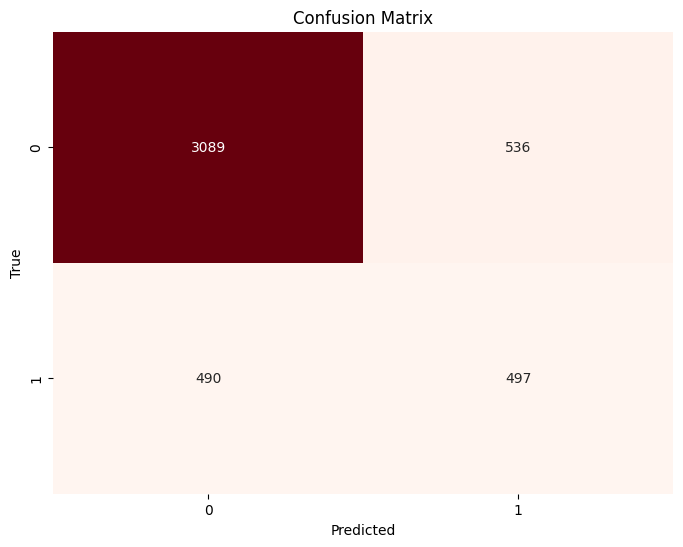

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()